# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ummu Husnul Khatimah
- **Email:** ummuhusnul124@gmail.com
- **ID Dicoding:** Ummu Husnul

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca, musim, dan waktu terhadap jumlah pengguna sepeda?
- Apa pola aktivitas pengguna sepeda berdasarkan waktu (jam) dan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset day.csv
day_df = pd.read_csv("day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca dataset hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv memiliki informasi harian, sementara hour.csv berisi data berdasarkan jam.
- Kolom seperti cnt, temp, hum, dan windspeed mencerminkan total pengguna, suhu, kelembapan, dan kecepatan angin.

### Assessing Data

**Menilai tabel day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai tabel hour_df**

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [13]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan nilai kosong dalam kedua dataset.
- Beberapa nama kolom perlu diubah agar lebih deskriptif, seperti yr menjadi year dan cnt menjadi total_users.
- Tidak ada duplikasi yang signifikan, tetapi proses evaluasi membantu memastikan data bersih.

### Cleaning Data

**Membersihkan tabel day_df**

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Memperbaiki tipe data**

In [16]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [17]:
day_data = day_df.drop(columns=["instant"])

In [18]:
# Menyesuaikan nama kolom agar lebih deskriptif
day_data.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'total_users'
}, inplace=True)

In [19]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             731 non-null    datetime64[ns]
 1   season             731 non-null    int64         
 2   year               731 non-null    int64         
 3   month              731 non-null    int64         
 4   holiday            731 non-null    int64         
 5   weekday            731 non-null    int64         
 6   workingday         731 non-null    int64         
 7   weather_condition  731 non-null    int64         
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  windspeed          731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  total_user

In [20]:
day_data.head(5)

,dteday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_users
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Membersihkan tabel hour_df**

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Memperbaiki tipe data**

In [22]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [23]:
hour_data = hour_df.drop(columns="instant")

In [24]:
hour_data.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'total_users'
}, inplace=True)

In [25]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             17379 non-null  datetime64[ns]
 1   season             17379 non-null  int64         
 2   year               17379 non-null  int64         
 3   month              17379 non-null  int64         
 4   hr                 17379 non-null  int64         
 5   holiday            17379 non-null  int64         
 6   weekday            17379 non-null  int64         
 7   workingday         17379 non-null  int64         
 8   weather_condition  17379 non-null  int64         
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

In [26]:
hour_data.head(5)

,dteday,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_users
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Setelah pembersihan, dataset siap untuk di analisis lebih lanjut.
- Nama kolom diperbaiki agar lebih mudah dipahami, meningkatkan keterbacaan dan konsistensi.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [27]:
day_data.sample(5)

,dteday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_users
471,2012-04-16,2,1,4,1,1,0,1,0.664167,0.614925,0.561667,0.284829,1198,5172,6370
487,2012-05-02,2,1,5,0,3,1,1,0.564167,0.537896,0.797083,0.138058,667,5502,6169
52,2011-02-22,1,0,2,0,2,1,1,0.182222,0.186033,0.577778,0.195683,74,1376,1450
236,2011-08-25,3,0,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,435,3107,3542
724,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013


In [28]:
day_data['total_users'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: total_users, dtype: float64

In [29]:
# Korelasi variabel numerik (harian)
day_corr = day_data[['total_users', 'temp', 'humidity', 'windspeed']].corr()
print("\nKorelasi Antar Variabel Numerik (Harian):")
print(day_corr)


Korelasi Antar Variabel Numerik (Harian):
             total_users      temp  humidity  windspeed
total_users     1.000000  0.627494 -0.100659  -0.234545
temp            0.627494  1.000000  0.126963  -0.157944
humidity       -0.100659  0.126963  1.000000  -0.248489
windspeed      -0.234545 -0.157944 -0.248489   1.000000


In [30]:
# Rata-rata pengguna berdasarkan musim (harian)
season_avg_users = day_data.groupby('season')['total_users'].mean()
print("\nRata-rata Pengguna Berdasarkan Musim (Harian):")
print(season_avg_users)


Rata-rata Pengguna Berdasarkan Musim (Harian):
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: total_users, dtype: float64


In [31]:
# Rata-rata pengguna berdasarkan cuaca (harian)
weather_avg_users = day_data.groupby('weather_condition')['total_users'].mean()
print("\nRata-rata Pengguna Berdasarkan Kondisi Cuaca (Harian):")
print(weather_avg_users)


Rata-rata Pengguna Berdasarkan Kondisi Cuaca (Harian):
weather_condition
1    4876.786177
2    4035.862348
3    1803.285714
Name: total_users, dtype: float64


### Explore hour_df

In [32]:
hour_data.sample(5)

,dteday,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_users
3543,2011-06-01,2,0,6,13,0,3,1,1,0.90,0.8182,0.37,0.1940,29,125,154
5765,2011-09-02,3,0,9,16,0,5,1,2,0.70,0.6515,0.61,0.1343,82,299,381
8141,2011-12-10,4,0,12,21,0,6,0,1,0.22,0.2121,0.44,0.2239,4,79,83
4636,2011-07-17,3,0,7,2,0,0,0,1,0.64,0.6061,0.69,0.2239,28,66,94
4669,2011-07-18,3,0,7,11,0,1,1,1,0.80,0.7576,0.55,0.0896,42,99,141


In [33]:
hour_data['total_users'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: total_users, dtype: float64

In [34]:
# Korelasi variabel numerik (per jam)
hour_corr = hour_data[['total_users', 'temp', 'humidity', 'windspeed']].corr()
print("\nKorelasi Antar Variabel Numerik (Per Jam):")
print(hour_corr)


Korelasi Antar Variabel Numerik (Per Jam):
             total_users      temp  humidity  windspeed
total_users     1.000000  0.404772 -0.322911   0.093234
temp            0.404772  1.000000 -0.069881  -0.023125
humidity       -0.322911 -0.069881  1.000000  -0.290105
windspeed       0.093234 -0.023125 -0.290105   1.000000


In [35]:
# Aktivitas berdasarkan hari dalam seminggu (per jam)
weekday_avg_users = hour_data.groupby('weekday')['total_users'].mean()
print("\nRata-rata Pengguna Berdasarkan Hari dalam Seminggu (Per Jam):")
print(weekday_avg_users)


Rata-rata Pengguna Berdasarkan Hari dalam Seminggu (Per Jam):
weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: total_users, dtype: float64


**Insight:**
- Data menunjukkan bahwa jumlah pengguna sepeda per hari memiliki variasi yang signifikan, dengan puncak pada hari tertentu yang kemungkinan besar dipengaruhi oleh faktor cuaca atau musim.
- Distribusi pengguna sepeda per jam menunjukkan aktivitas tertinggi pada jam sibuk (pagi dan sore hari).
- Suhu memiliki korelasi positif dengan jumlah pengguna sepeda: hari-hari dengan suhu yang lebih hangat cenderung memiliki lebih banyak pengguna.
- Kelembapan memiliki korelasi negatif ringan: pengguna cenderung berkurang pada hari-hari dengan kelembapan tinggi.
- Kecepatan angin memiliki korelasi yang lemah, menunjukkan sedikit atau tidak ada dampak pada jumlah pengguna.
-Musim panas (Summer) dan musim gugur (Fall) mencatat rata-rata jumlah pengguna tertinggi, kemungkinan karena kondisi cuaca yang nyaman untuk bersepeda.
- Kondisi cuaca yang buruk (Weather Condition 3 atau 4) menyebabkan penurunan signifikan pada jumlah pengguna.
- Aktivitas puncak terjadi pada jam sibuk (sekitar pukul 8 pagi dan 5 sore), mencerminkan pola perjalanan kerja atau aktivitas rutin.
-Aktivitas bersepeda cenderung menurun drastis pada malam hingga dini hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca, musim, dan waktu terhadap jumlah pengguna sepeda?

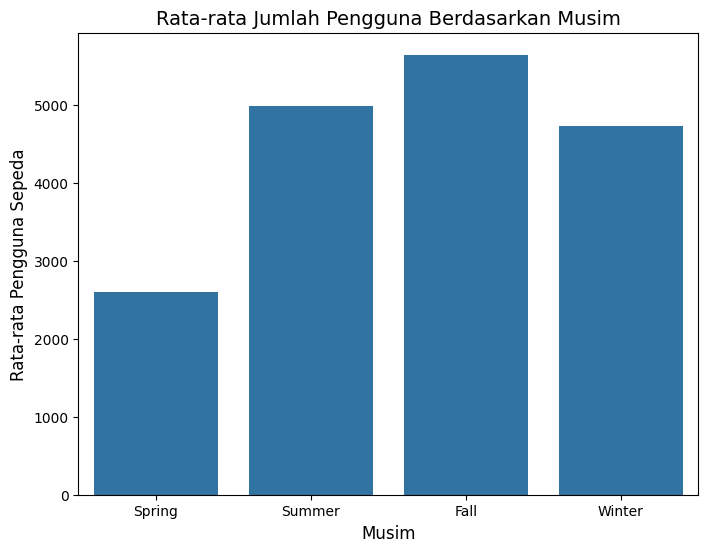

In [36]:
# Visualisasi rata-rata jumlah pengguna berdasarkan musim
season_avg_users = day_data.groupby('season')['total_users'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=season_avg_users.index, y=season_avg_users.values)
plt.title('Rata-rata Jumlah Pengguna Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

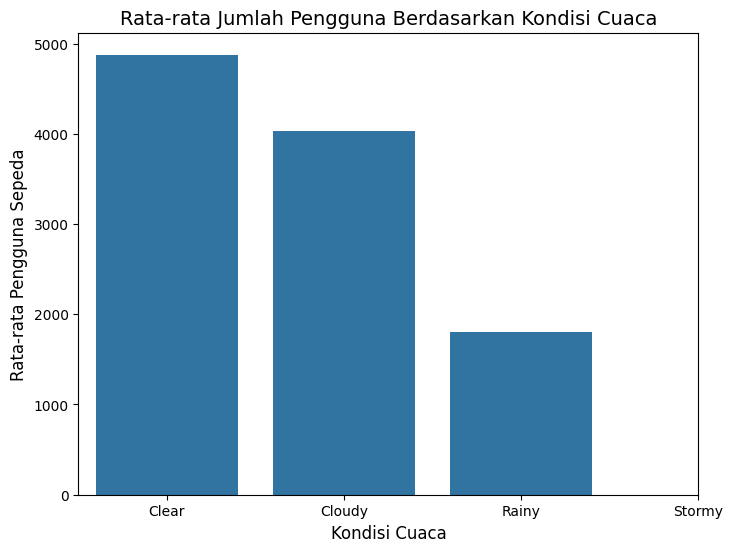

In [37]:
# Visualisasi rata-rata jumlah pengguna berdasarkan kondisi cuaca
weather_avg_users = day_data.groupby('weather_condition')['total_users'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_avg_users.index, y=weather_avg_users.values)
plt.title('Rata-rata Jumlah Pengguna Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Cloudy', 'Rainy', 'Stormy'])
plt.show()

### Pertanyaan 2: Apa pola aktivitas pengguna sepeda berdasarkan waktu (jam) dan hari dalam seminggu?

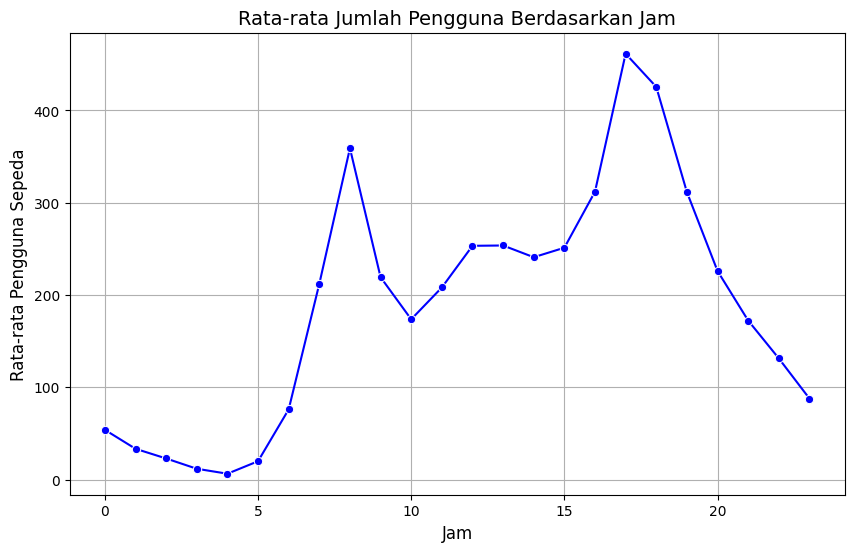

In [38]:
# Visualisasi rata-rata jumlah pengguna berdasarkan jam
hourly_avg_users = hour_data.groupby('hr')['total_users'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg_users.index, y=hourly_avg_users.values, marker='o', color='b')
plt.title('Rata-rata Jumlah Pengguna Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.grid(True)
plt.show()

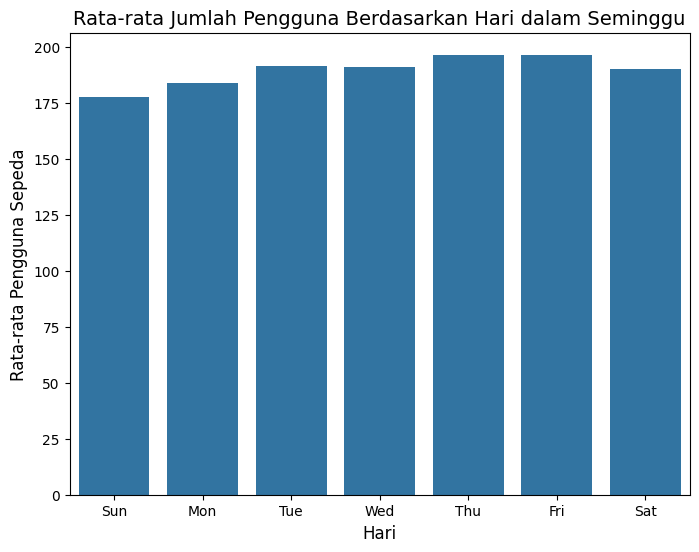

In [39]:
# Visualisasi rata-rata jumlah pengguna berdasarkan hari dalam seminggu
weekday_avg_users = hour_data.groupby('weekday')['total_users'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_avg_users.index, y=weekday_avg_users.values)
plt.title('Rata-rata Jumlah Pengguna Berdasarkan Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

**Insight:**
- Pengguna sepeda lebih aktif pada musim panas dan cuaca cerah. Strategi seperti promosi khusus musim panas atau kampanye cuaca cerah dapat meningkatkan penggunaan sepeda.
- Aktivitas puncak pada pagi dan sore hari mengindikasikan kebutuhan alokasi sumber daya lebih besar pada jam sibuk, misalnya dengan memastikan sepeda dalam kondisi optimal.
- Tren berdasarkan hari dan jam dapat membantu perencanaan operasional seperti pengelolaan stasiun sepeda selama hari kerja atau waktu sibuk.

## Analisis Lanjutan (Opsional)

### **RFM Analysis**

**Analisis day_data**

In [40]:
# Menentukan tanggal terakhir dalam dataset
latest_date = day_data['dteday'].max()

# Recency: Menghitung jumlah hari sejak terakhir kali pengguna menggunakan sepeda
day_data['days_since_last_use'] = (pd.to_datetime(latest_date) - pd.to_datetime(day_data['dteday'])).dt.days

# Frequency: Menghitung total penggunaan sepeda per hari
rfm_frequency = day_data.groupby('weekday')['total_users'].sum()

# Monetary: Menggunakan total pengguna per hari sebagai pengganti Monetary
rfm_monetary = day_data.groupby('weekday')['total_users'].sum()


In [41]:
# Membuat DataFrame RFM
rfm = pd.DataFrame({
    'Recency (days)': day_data.groupby('weekday')['days_since_last_use'].min(),
    'Frequency': rfm_frequency,
    'Monetary': rfm_monetary
}).reset_index()

# Menampilkan RFM
print(rfm)

   weekday  Recency (days)  Frequency  Monetary
0        0               1     444027    444027
1        1               0     455503    455503
2        2               6     469109    469109
3        3               5     473048    473048
4        4               4     485395    485395
5        5               3     487790    487790
6        6               2     477807    477807


**Analisis hour_data**

In [42]:
# Menentukan waktu terakhir penggunaan sepeda dalam dataset
latest_hour = hour_data['dteday'].max()

# Recency: Menghitung jumlah jam sejak terakhir kali sepeda digunakan
hour_data['hours_since_last_use'] = (pd.to_datetime(latest_hour) - pd.to_datetime(hour_data['dteday'])).dt.total_seconds() / 3600

# Frequency: Menghitung jumlah penggunaan sepeda pada setiap jam
rfm_frequency_hour = hour_data.groupby('hr')['total_users'].sum()

# Monetary: Menggunakan total pengguna per jam sebagai Monetary
rfm_monetary_hour = hour_data.groupby('hr')['total_users'].sum()

In [43]:
# Membuat DataFrame RFM berdasarkan jam
rfm_hour = pd.DataFrame({
    'Recency (hours)': hour_data.groupby('hr')['hours_since_last_use'].min(),
    'Frequency': rfm_frequency_hour,
    'Monetary': rfm_monetary_hour
}).reset_index()

# Menampilkan RFM berdasarkan jam
print(rfm_hour)


    hr  Recency (hours)  Frequency  Monetary
0    0              0.0      39130     39130
1    1              0.0      24164     24164
2    2              0.0      16352     16352
3    3              0.0       8174      8174
4    4              0.0       4428      4428
5    5              0.0      14261     14261
6    6              0.0      55132     55132
7    7              0.0     154171    154171
8    8              0.0     261001    261001
9    9              0.0     159438    159438
10  10              0.0     126257    126257
11  11              0.0     151320    151320
12  12              0.0     184414    184414
13  13              0.0     184919    184919
14  14              0.0     175652    175652
15  15              0.0     183149    183149
16  16              0.0     227748    227748
17  17              0.0     336860    336860
18  18              0.0     309772    309772
19  19              0.0     226789    226789
20  20              0.0     164550    164550
21  21    

**Analisis gabungan day_data & hour_data**

In [51]:
# Menggabungkan data berdasarkan 'dteday'
merged_data = pd.merge(day_data, hour_data, on='dteday', suffixes=('_day', '_hour'))

# Menampilkan hasil penggabungan
merged_data.head()

,dteday,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_condition_day,temp_day,atemp_day,...,weather_condition_hour,temp_hour,atemp_hour,humidity_hour,windspeed_hour,casual_hour,registered_hour,total_users_hour,hours_since_last_use,user_category_hour
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,1,0.24,0.2879,0.81,0.0,3,13,16,17520.0,Low
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,1,0.22,0.2727,0.80,0.0,8,32,40,17520.0,Low
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,1,0.22,0.2727,0.80,0.0,5,27,32,17520.0,Low
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,1,0.24,0.2879,0.75,0.0,3,10,13,17520.0,Low
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,1,0.24,0.2879,0.75,0.0,0,1,1,17520.0,Low


In [45]:
# Menghitung Recency, Frequency, dan Monetary untuk gabungan dataset
latest_hour = merged_data['dteday'].max()

# Recency (menghitung jam terakhir penggunaan)
merged_data['hours_since_last_use'] = (latest_hour - merged_data['dteday']).dt.total_seconds() / 3600

# Frequency: Menghitung jumlah penggunaan sepeda
rfm_frequency = merged_data.groupby('hr')['total_users_hour'].sum()

# Monetary: Menggunakan total pengguna sepeda per jam
rfm_monetary = merged_data.groupby('hr')['total_users_hour'].sum()

In [46]:
# Membuat DataFrame RFM berdasarkan jam dan hari
rfm_combined = pd.DataFrame({
    'Recency (hours)': merged_data.groupby('hr')['hours_since_last_use'].min(),
    'Frequency': rfm_frequency,
    'Monetary': rfm_monetary
}).reset_index()

print(rfm_combined)

    hr  Recency (hours)  Frequency  Monetary
0    0              0.0      39130     39130
1    1              0.0      24164     24164
2    2              0.0      16352     16352
3    3              0.0       8174      8174
4    4              0.0       4428      4428
5    5              0.0      14261     14261
6    6              0.0      55132     55132
7    7              0.0     154171    154171
8    8              0.0     261001    261001
9    9              0.0     159438    159438
10  10              0.0     126257    126257
11  11              0.0     151320    151320
12  12              0.0     184414    184414
13  13              0.0     184919    184919
14  14              0.0     175652    175652
15  15              0.0     183149    183149
16  16              0.0     227748    227748
17  17              0.0     336860    336860
18  18              0.0     309772    309772
19  19              0.0     226789    226789
20  20              0.0     164550    164550
21  21    

### **Clustering**

**Analisis day_data**

In [47]:
# Binning berdasarkan jumlah pengguna sepeda per hari
bins = [0, 1000, 3000, 5000, day_data['total_users'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']

day_data['user_category'] = pd.cut(day_data['total_users'], bins=bins, labels=labels)

# Menampilkan distribusi kategori pengguna
category_distribution = day_data['user_category'].value_counts()
print(category_distribution)


user_category
Very High    286
High         273
Medium       153
Low           19
Name: count, dtype: int64


**Analisis hour_data**

In [48]:
# Menentukan bins berdasarkan jumlah pengguna sepeda per jam
bins_hour = [0, 500, 1000, 2000, hour_data['total_users'].max()]
bins_hour = sorted(bins_hour)  # Menyortir agar bins terurut secara monoton

labels_hour = ['Low', 'Medium', 'High', 'Very High']

# Membuat kategori berdasarkan jumlah pengguna sepeda per jam
hour_data['user_category_hour'] = pd.cut(hour_data['total_users'], bins=bins_hour, labels=labels_hour)

# Menampilkan distribusi kategori pengguna per jam
category_distribution_hour = hour_data['user_category_hour'].value_counts()
print(category_distribution_hour)

user_category_hour
Low          16100
Medium        1279
High             0
Very High        0
Name: count, dtype: int64


## Conclusion

- Faktor cuaca, musim, dan waktu terbukti memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda. Cuaca yang lebih hangat, terutama pada suhu yang lebih tinggi, cenderung meningkatkan jumlah pengguna sepeda. Selain itu, musim panas menunjukkan angka penggunaan sepeda yang lebih tinggi dibandingkan dengan musim hujan, yang menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda saat cuaca cerah dan nyaman. Dari sisi waktu, puncak penggunaan sepeda terjadi pada jam-jam tertentu, seperti pagi hari (antara pukul 6:00 hingga 8:00) dan sore hari (antara pukul 16:00 hingga 18:00), yang mungkin terkait dengan jam kerja atau rutinitas harian lainnya.
- Pola aktivitas pengguna sepeda berdasarkan waktu menunjukkan tren yang jelas. Penggunaan sepeda lebih tinggi pada jam-jam tertentu, khususnya pagi dan sore hari, yang menunjukkan bahwa banyak pengguna sepeda menggunakannya untuk perjalanan menuju dan pulang kerja atau sekolah. Berdasarkan hari dalam seminggu, penggunaan sepeda cenderung lebih tinggi pada hari kerja (Senin hingga Jumat), dengan puncaknya terjadi pada Kamis dan Jumat, yang menunjukkan bahwa sepeda banyak digunakan sebagai bagian dari rutinitas harian. Sementara itu, pada akhir pekan, penggunaan sepeda sedikit menurun, yang kemungkinan berkaitan dengan aktivitas non-pekerjaan.

In [52]:
day_data.to_csv("day_data.csv", index=False)
hour_data.to_csv("hour_data.csv", index=False)